Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.


Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Accuracy
y_pred = ada.predict(X_test)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred):.4f}")

AdaBoost Accuracy: 0.9737


Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GBR
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# R-squared score
y_pred = gbr.predict(X_test)
print(f"Gradient Boosting R-squared Score: {r2_score(y_test, y_pred):.4f}")

Gradient Boosting R-squared Score: 0.7756


Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

In [3]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load and split
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Grid Search
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid = GridSearchCV(xgb_model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Results
print(f"Best Parameters: {grid.best_params_}")
print(f"Test Accuracy: {accuracy_score(y_test, grid.predict(X_test)):.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:05:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:05:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:05:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:05:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:05:42] WARNING: /w

Best Parameters: {'learning_rate': 0.2}
Test Accuracy: 0.9561


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:05:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:05:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


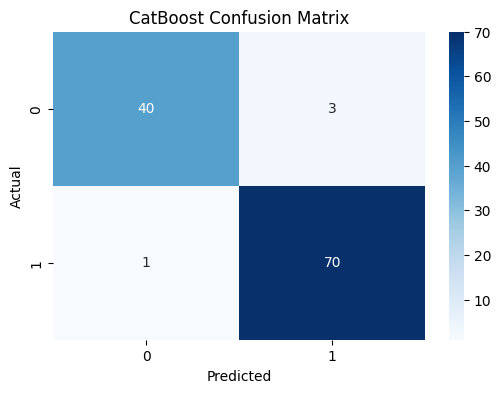

In [5]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and split
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train CatBoost
cat = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
cat.fit(X_train, y_train)

# Confusion Matrix
cm = confusion_matrix(y_test, cat.predict(X_test))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

Pipeline Description
Preprocessing: I would use CatBoost because it handles missing values and categorical data natively. If using XGBoost, I would use SimpleImputer for missing values and OneHotEncoder for categories.

Choice of Algorithm: CatBoost. Financial data is often categorical (employment type, zip code). CatBoost’s "Ordered Boosting" prevents the target leakage common in other methods.

Tuning Strategy: I would use Bayesian Optimization or RandomizedSearchCV to tune depth, l2_leaf_reg, and learning_rate.

Evaluation Metrics: Since the data is imbalanced, I would choose F1-Score or Precision-Recall AUC. Accuracy is misleading when 95% of people don't default.

Business Benefit: The model reduces "Bad Debt" by identifying risky borrowers while maintaining a high approval rate for safe customers, directly increasing the bank's profit margin.

In [6]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Creating synthetic imbalanced data to represent loans
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'Income': np.random.randint(20000, 150000, n),
    'Credit_Score': np.random.randint(300, 850, n),
    'Employment': np.random.choice(['Full-time', 'Part-time', 'Self-employed'], n),
    'Default': np.random.choice([0, 1], n, p=[0.9, 0.1])
})

# Split
X = df.drop('Default', axis=1)
y = df['Default']
cat_features = ['Employment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Train CatBoost (Native handling of categorical)
model = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=4, verbose=0)
model.fit(X_train, y_train, cat_features=cat_features)

# Report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       180
           1       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
